## Задание
Имеется трехканальная СМО с очередью: интенсивность потока заявок λ = 4 заявки в 1 мин, среднее время обслуживания
одной заявки одним каналом tоб = [10, 250] секунд, максимальное число заявок в очереди m = [2, 100]. Функция φ(k)
= kφ. Найти Q и A проп. способности. Построить графики. Сравнить параметры для случая без взаимопомощи и с
равномерной взаимопомощью.

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
# Параметры системы
arrival_rate = 4  # Интенсивность потока заявок (заявок в минуту)
num_channels = 3  # Количество каналов обслуживания

In [4]:
# Сетка значений для времени обслуживания и максимальной длины очереди
service_time = np.arange(10, 251, 1)  # Время обслуживания (сек)
service_rate = 1 / service_time * 60  # Интенсивность обслуживания (мин)
max_queue = np.arange(2, 101, 1)  # Максимальная длина очереди

# Создание сетки параметров
service_rate, max_queue = np.meshgrid(service_rate, max_queue)

# Нагрузка на систему
load_factor = arrival_rate / service_rate
normalized_load = load_factor / num_channels

# Вероятность состояния простоя (p0)
p0 = (sum(load_factor ** i / math.factorial(i) for i in range(num_channels + 1)) +
        (load_factor ** (num_channels + 1) / math.factorial(num_channels + 1)) *
        (1 - (load_factor / num_channels) ** max_queue) / (1 - load_factor / num_channels)) ** -1

# Пропускная способность без взаимопомощи
block_probability_no_help = ( p0 * load_factor ** (num_channels + max_queue) /
        (num_channels ** max_queue * math.factorial(num_channels)))

throughput_no_help = 1 - block_probability_no_help
absolute_throughput_no_help = arrival_rate * throughput_no_help

# Пропускная способность с взаимопомощью
throughput_with_help = (1 - normalized_load ** (num_channels + max_queue)
                        ) / (1 - normalized_load ** (num_channels + max_queue + 1))
        
absolute_throughput_with_help = arrival_rate * throughput_with_help

In [5]:
# Графики параметров
parameters = {
    'Относительная пропускная способность без взаимопомощи': throughput_no_help,
    'Абсолютная пропускная способность без взаимопомощи': absolute_throughput_no_help,
    'Относительная пропускная способность с взаимопомощью': throughput_with_help,
    'Абсолютная пропускная способность с взаимопомощью': absolute_throughput_with_help
}

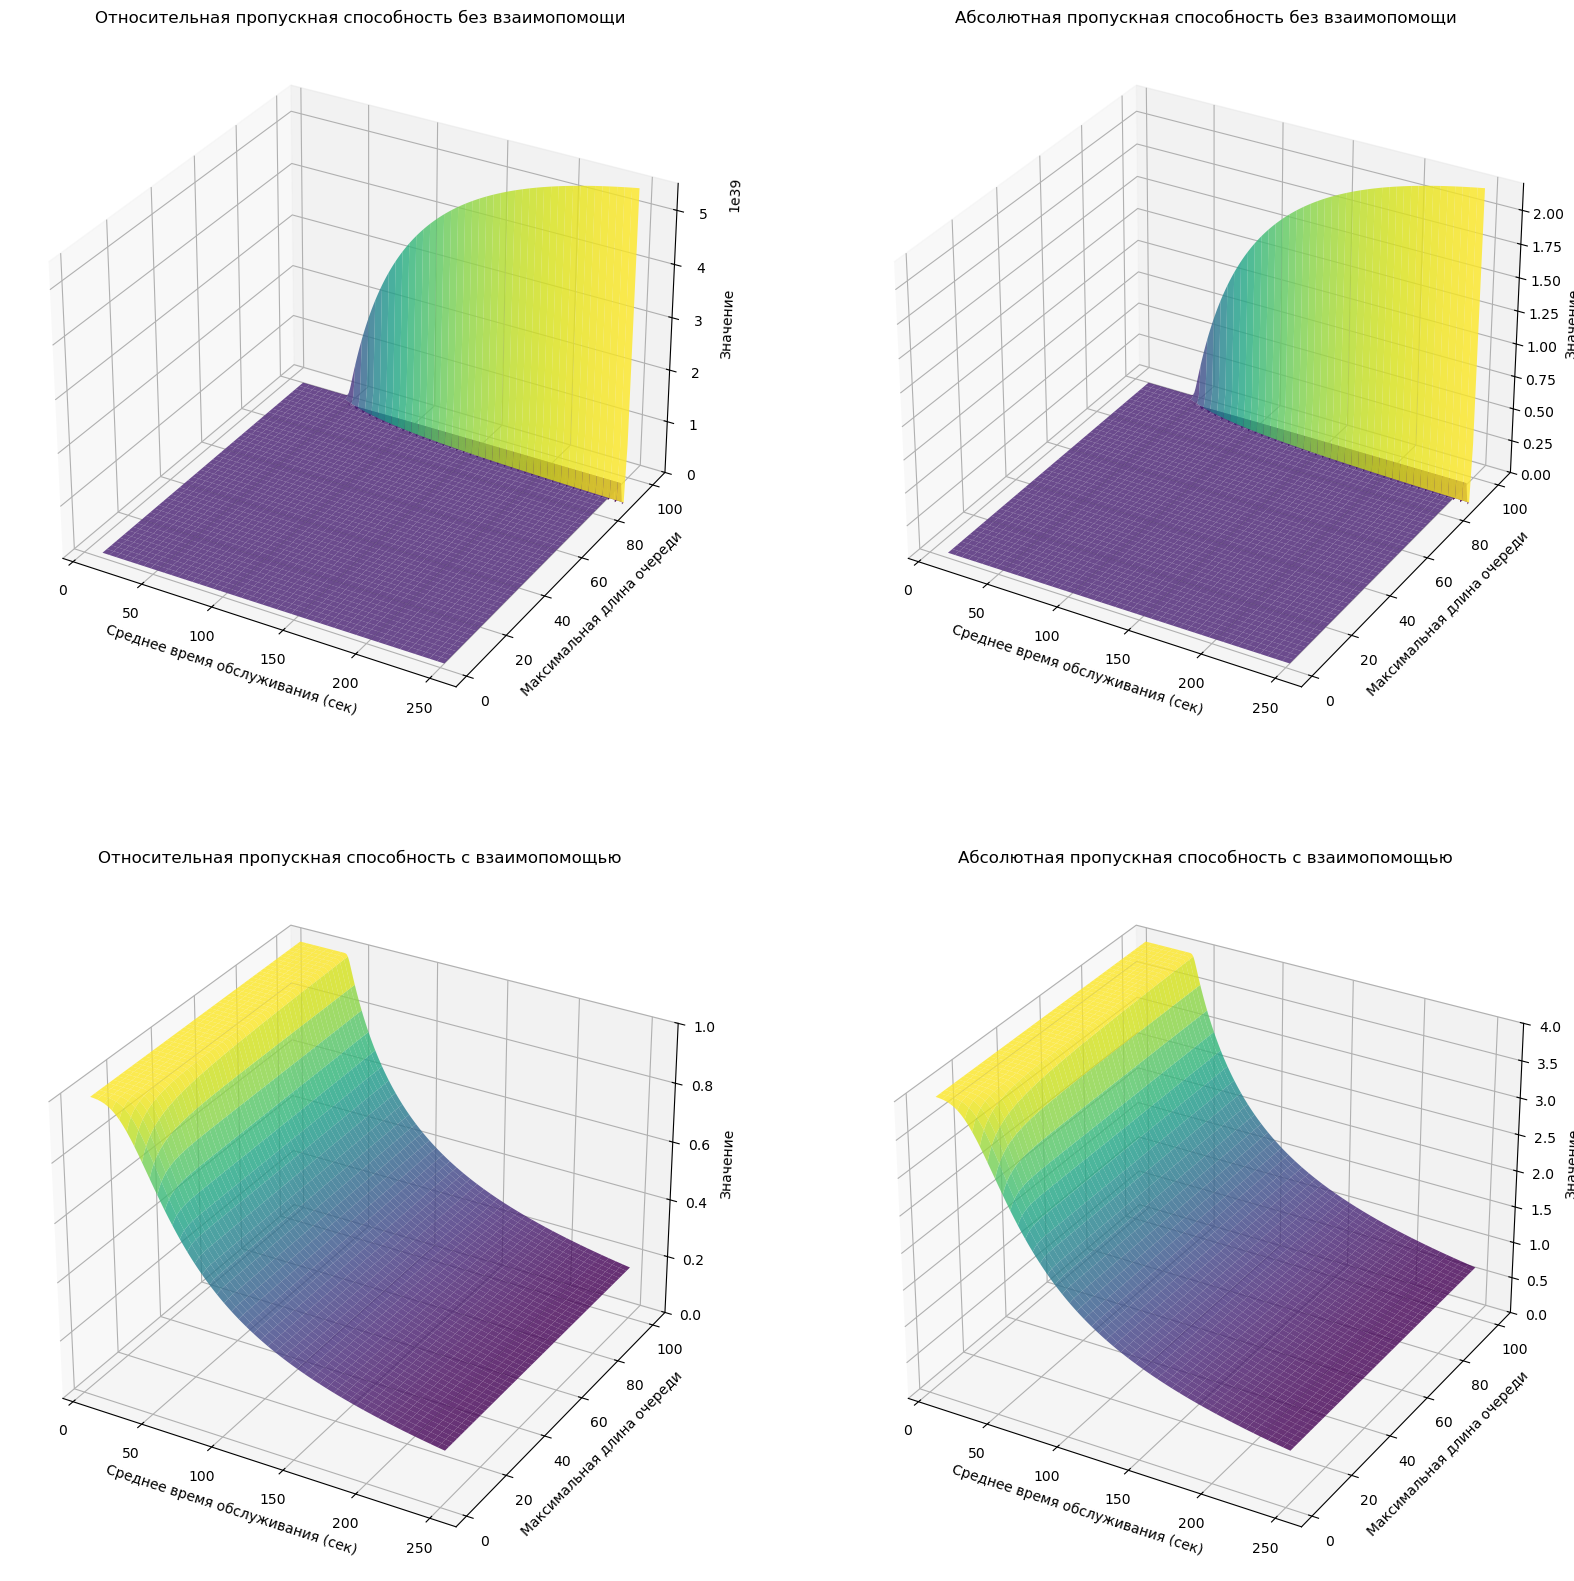

In [7]:
# Визуализация результатов

# Создание 3D графиков для каждого параметра
fig, axes = plt.subplots(2, 2, figsize=(20, 20), subplot_kw={'projection': '3d'})

for i, (title, value) in enumerate(parameters.items()):
    ax = axes[i // 2][i % 2]
    ax.plot_surface(service_time, max_queue, value, alpha=0.8, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel('Среднее время обслуживания (сек)')
    ax.set_ylabel('Максимальная длина очереди')
    ax.set_zlabel('Значение')
    ax.set_zlim(0, np.nanmax(value))